In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
df = pd.read_csv("output.csv")

In [10]:
df.head()


,Year,Month,State,County,Rate
0,2015,February,Mississippi,Newton County,6.1
1,2015,February,Mississippi,Panola County,9.4
2,2015,February,Mississippi,Monroe County,7.9
3,2015,February,Mississippi,Hinds County,6.1
4,2015,February,Mississippi,Kemper County,10.6


In [11]:
df.tail()

,Year,Month,State,County,Rate
885543,2009,November,Maine,Somerset County,10.5
885544,2009,November,Maine,Oxford County,10.5
885545,2009,November,Maine,Knox County,7.5
885546,2009,November,Maine,Piscataquis County,11.3
885547,2009,November,Maine,Aroostook County,9.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885548 entries, 0 to 885547
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Year    885548 non-null  int64  
 1   Month   885548 non-null  object 
 2   State   885548 non-null  object 
 3   County  885548 non-null  object 
 4   Rate    885548 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 33.8+ MB


In [13]:
grouped_df = df.groupby(["State"])["Rate"].aggregate("mean").reset_index()

In [14]:
grouped_df.head()

,State,Rate
0,Alabama,7.723844
1,Arizona,9.274588
2,Arkansas,6.782210
3,California,9.045005
4,Colorado,5.358946


In [16]:
grouped_df.tail()

,State,Rate
42,Virginia,5.450772
43,Washington,8.031513
44,West Virginia,8.104809
45,Wisconsin,5.815659
46,Wyoming,4.576503


In [18]:
df.describe()

,Year,Rate
count,885548.000000,885548.000000
mean,2003.000017,6.175010
std,7.824893,3.112535
min,1990.000000,0.000000
25%,1996.000000,4.000000
50%,2003.000000,5.500000
75%,2010.000000,7.700000
max,2016.000000,58.400000


In [58]:
grouped_df.shape

(47, 2)

C:\Users\fabia\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


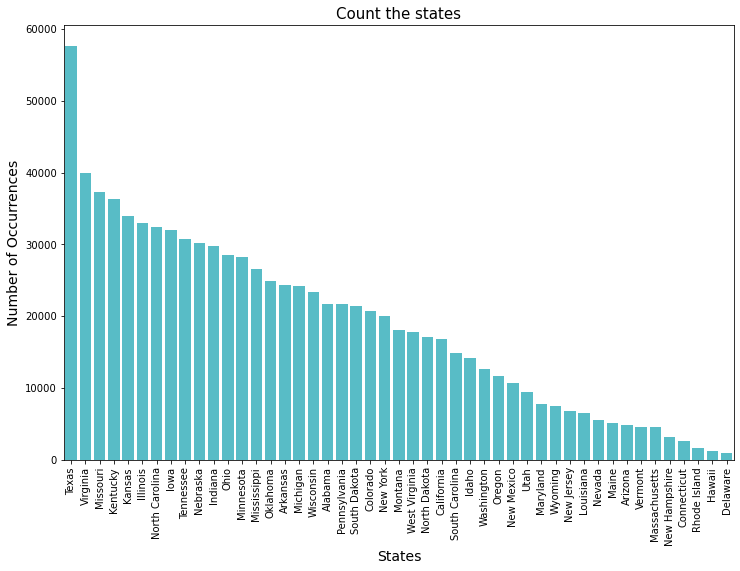

In [33]:
color = sns.color_palette()
cnt_srs = df.State.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[9])
plt.ylabel('Number of Occurrences', fontsize=14)
plt.xlabel('States', fontsize=14)
plt.title('Count the states', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

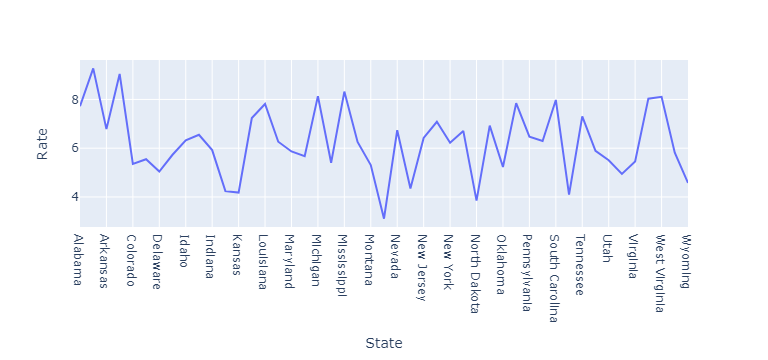

In [48]:
fig = px.line(grouped_df,x ="State", y ="Rate")
fig.show()

In [50]:
max(grouped_df["Rate"])

9.274588477366255

In [54]:
make_total = df.pivot_table("Rate",index=['State'],aggfunc='mean')
make_total.sort_values(by=['Rate'], ascending=False)

,Rate
State,
Arizona,9.274588
California,9.045005
Mississippi,8.320517
Michigan,8.136136
West Virginia,8.104809
Washington,8.031513
South Carolina,7.978737
Oregon,7.849271
Louisiana,7.812949


 What states have had the highest unemployment rate overall? 


This dataset contains data from all the counties in 47 different states. it also shows the unemployment rate for each county at a given time. I was trying to find out with states have the hight unemployment rate overall, so first I grouped the dataset by state and obtained a mean rate for all counties that are part of that state. Then I wanted to see which state had more data and using a bar chart found out that Texas has the most data available in this specific dataset. Then used grouped_df variable that contains unemployment rates grouped by state to create a line chart. This chart shows that Arizona, California, and Missisipi have the highest unemployment rate but I wanted to verify that so I created a pivot table that shows the actual numbers and it turns out it was correct. These are the number for the top 3 states with with highest unemployment rate
Arizona	9.274588
California	9.045005
Mississippi	8.320517